In [1]:
from fredapi import Fred
import datetime as dt
import json
import os

In [2]:
import numpy as np

In [3]:
import pandas as pd
pd.options.display.max_colwidth = 60

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(20, 10)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
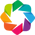

In [5]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
import panel as pn
import panel.widgets as pnw
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

### Retrieve API Key - Prefer by env variables; else Brute Force

In [6]:
# Extract API keys from environment variables
FRED_API_KEY = os.getenv('FRED_API_KEY')
print(FRED_API_KEY)

None


In [7]:
# Extract API keys from environment variables
FRED_API_KEY = '51a3310fe6b34313e98eac05fcf2f0da'
print(FRED_API_KEY)

51a3310fe6b34313e98eac05fcf2f0da


In [8]:
fred = Fred(api_key='51a3310fe6b34313e98eac05fcf2f0da')

### Get Data and do some graphs

In [9]:
data1 = fred.get_series('SP500')

In [10]:
data1.head()

2010-05-05    1165.90
2010-05-06    1128.15
2010-05-07    1110.88
2010-05-10    1159.73
2010-05-11    1155.79
dtype: float64

In [11]:
data2 = fred.get_series('GDP')

In [12]:
data2.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [13]:
s = fred.get_series('SP500', observation_start='2014-09-02', observation_end='2014-09-05')
s.tail()

2014-09-02    2002.28
2014-09-03    2000.72
2014-09-04    1997.65
2014-09-05    2007.71
dtype: float64

In [14]:
info = fred.get_series_info('PAYEMS')
info['title']

'All Employees, Total Nonfarm'

In [15]:
personal_income_series = fred.search_by_release(175, limit=5, order_by='popularity', sort_order='desc')
personal_income_series['title']

series id
PCPI06037             Per Capita Personal Income in Los Angeles County, CA
SEAT653PCPI    Per Capita Personal Income in Seattle-Tacoma-Bellevue, W...
PCPI06075      Per Capita Personal Income in San Francisco County/city, CA
CHIC917PCPI    Per Capita Personal Income in Chicago-Naperville-Elgin, ...
PCPI12086              Per Capita Personal Income in Miami-Dade County, FL
Name: title, dtype: object

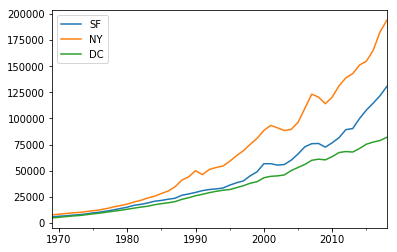

In [16]:
df = {}
df['SF'] = fred.get_series('PCPI06075')
df['NY'] = fred.get_series('PCPI36061')
df['DC'] = fred.get_series('PCPI11001')
df = pd.DataFrame(df)
df.plot()

In [17]:
df = fred.search_by_category(101, limit=10, order_by='popularity', sort_order='desc')
df['title']

series id
SLOAS                         Student Loans Owned and Securitized, Outstanding
TOTALSL               Total Consumer Credit Owned and Securitized, Outstanding
TERMCBAUTO48NS     Finance Rate on Consumer Installment Loans at Commercial...
TERMCBCCALLNS      Commercial Bank Interest Rate on Credit Card Plans, All ...
MVLOAS                  Motor Vehicle Loans Owned and Securitized, Outstanding
TERMCBPER24NS      Finance Rate on Personal Loans at Commercial Banks, 24 M...
REVOLSL              Total Revolving Credit Owned and Securitized, Outstanding
RIFLPBCIANM60NM    Finance Rate on Consumer Installment Loans at Commercial...
TERMCBCCINTNS      Commercial Bank Interest Rate on Credit Card Plans, Acco...
TERMAFCNCNSA       New Car Average Finance Rate at Auto Finance Companies (...
Name: title, dtype: object

In [18]:
df = fred.search_by_release(151)
df['title'].head(10)

series id
AKPCPI                              Per Capita Personal Income in Alaska
ALPCPI                             Per Capita Personal Income in Alabama
ARPCPI                            Per Capita Personal Income in Arkansas
AZPCPI                             Per Capita Personal Income in Arizona
BEAFWPCPI          Per Capita Personal Income in the Far West BEA Region
BEAGLPCPI       Per Capita Personal Income in the Great Lakes BEA Region
BEAMEPCPI           Per Capita Personal Income in the Mideast BEA Region
BEANEPCPI       Per Capita Personal Income in the New England BEA Region
BEAPLPCPI            Per Capita Personal Income in the Plains BEA Region
BEARMPCPI    Per Capita Personal Income in the Rocky Mountain BEA Region
Name: title, dtype: object

In [19]:
state_df = df[~df['title'].str.startswith('Per Capita Personal Income in the')]

In [20]:
len(state_df)

50

In [21]:
state_df.id.str[:2]

series id
AKPCPI    AK
ALPCPI    AL
ARPCPI    AR
AZPCPI    AZ
CAPCPI    CA
COPCPI    CO
CTPCPI    CT
DEPCPI    DE
FLPCPI    FL
GAPCPI    GA
HIPCPI    HI
IAPCPI    IA
IDPCPI    ID
ILPCPI    IL
INPCPI    IN
KSPCPI    KS
KYPCPI    KY
LAPCPI    LA
MAPCPI    MA
MDPCPI    MD
MEPCPI    ME
MIPCPI    MI
MNPCPI    MN
MOPCPI    MO
MSPCPI    MS
MTPCPI    MT
NCPCPI    NC
NDPCPI    ND
NEPCPI    NE
NHPCPI    NH
NJPCPI    NJ
NMPCPI    NM
NVPCPI    NV
NYPCPI    NY
OHPCPI    OH
OKPCPI    OK
ORPCPI    OR
PAPCPI    PA
RIPCPI    RI
SCPCPI    SC
SDPCPI    SD
TNPCPI    TN
TXPCPI    TX
UTPCPI    UT
VAPCPI    VA
VTPCPI    VT
WAPCPI    WA
WIPCPI    WI
WVPCPI    WV
WYPCPI    WY
Name: id, dtype: object

In [22]:
income_by_state = {}
for series_id in state_df.index:
    income_by_state[series_id[:2]] = fred.get_series(series_id)

In [23]:
income_by_state = pd.DataFrame(income_by_state)

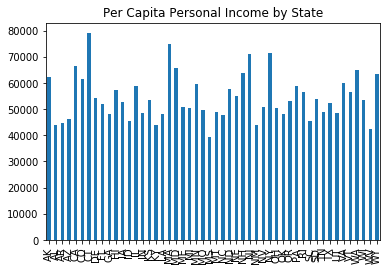

In [24]:
income_by_state.iloc[-1].plot(kind='bar', title = 'Per Capita Personal Income by State')

In [25]:
# GDP
gdp = fred.get_series('GDP')
gdp.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [26]:
# GDP REAL
gdp_real = fred.get_series('GDPC1')
gdp_real.tail()

2019-01-01    18927.281
2019-04-01    19021.860
2019-07-01    19121.112
2019-10-01    19221.970
2020-01-01    18987.877
dtype: float64

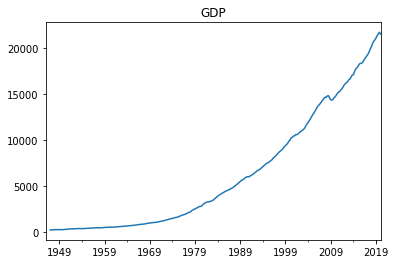

In [27]:
gdp.plot(title = "GDP")

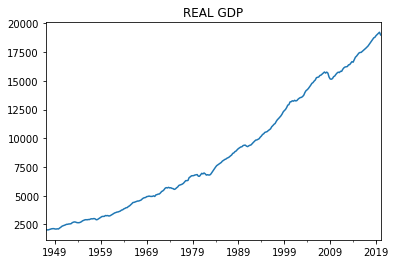

In [28]:
gdp_real.plot(title = "REAL GDP")

In [29]:
# REAL MEDIAN HOUSEHOLD INCOME
HouseHold_Income_Median = fred.get_series('MEHOINUSA672N')
HouseHold_Income_Median.tail()

2014-01-01    56969.0
2015-01-01    59901.0
2016-01-01    61779.0
2017-01-01    62626.0
2018-01-01    63179.0
dtype: float64

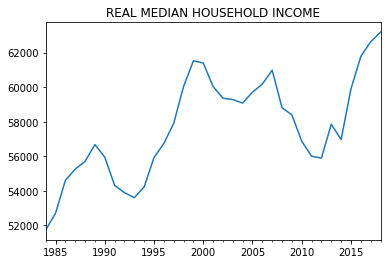

In [30]:
HouseHold_Income_Median.plot(title = "REAL MEDIAN HOUSEHOLD INCOME")

In [31]:
# Real gross domestic product per capita
gdp_real_percapita = fred.get_series('A939RX0Q048SBEA')
gdp_real_percapita.tail()

2019-01-01    57719.0
2019-04-01    57946.0
2019-07-01    58167.0
2019-10-01    58392.0
2020-01-01    57621.0
dtype: float64

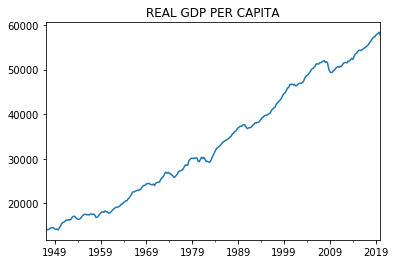

In [32]:
gdp_real_percapita.plot(title = "REAL GDP PER CAPITA")

In [33]:
# Real gross domestic product per capita
personal_saving_rate = fred.get_series('PSAVERT')
personal_saving_rate.tail()

2019-11-01     7.7
2019-12-01     7.5
2020-01-01     7.7
2020-02-01     8.0
2020-03-01    13.1
dtype: float64

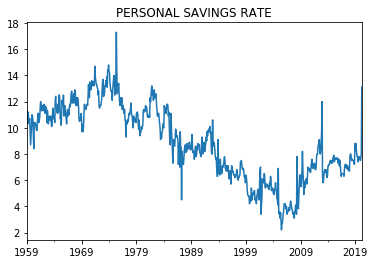

In [34]:
personal_saving_rate.plot(title = "PERSONAL SAVINGS RATE")

# Some Interactive Plots

In [35]:
gdp.head()

1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64

In [36]:
# GDP 

gdp.hvplot(kind = "line", ylabel = "GDP")

:Curve   [index]   (0)

In [37]:
# Real GDP

gdp_real.hvplot(kind = "line", ylabel = "REAL GDP")

:Curve   [index]   (0)

In [38]:
# Real GDP PER CAPITA

gdp_real_percapita.hvplot(kind = "line", ylabel = "REAL GDP PER CAPITA")

:Curve   [index]   (0)

In [39]:
# Personal Savings Rate

personal_saving_rate.hvplot(kind = "line", ylabel = "PERSONAL SAVING RATE")

:Curve   [index]   (0)

In [40]:
# Search for available data in FRED

fred.search('savings').T

series id                                                                      PSAVERT  \
frequency                                                                      Monthly   
frequency_short                                                                      M   
id                                                                             PSAVERT   
last_updated                                                 2020-04-30 07:50:16-05:00   
notes                      BEA Account Code: A072RC Personal saving as a percentage...   
observation_end                                                    2020-03-01 00:00:00   
observation_start                                                  1959-01-01 00:00:00   
popularity                                                                          82   
realtime_end                                                       2020-05-05 00:00:00   
realtime_start                                                     2020-05-05 00:00:00   
seasonal_adjustment                                    Seasonally Adjusted Annual Rate   
seasonal_adjustment_short                                                         SAAR   
title                                                             Personal Saving Rate   
units                                                                          Percent   
units_short                                                                          %   

series id                                                                      SAVINGS  \
frequency                                                        Weekly, Ending Monday   
frequency_short                                                                      W   
id                                                                             SAVINGS   
last_updated                                                 2020-04-30 15:39:28-05:00   
notes                      The savings deposits component of M2 consists of passboo...   
observation_end                                                    2020-04-20 00:00:00   
observation_start                                                  1975-01-06 00:00:00   
popularity                                                                          64   
realtime_end                                                       2020-05-05 00:00:00   
realtime_start                                                     2020-05-05 00:00:00   
seasonal_adjustment                                                Seasonally Adjusted   
seasonal_adjustment_short                                                           SA   
title                            Total Savings Deposits at all Depository Institutions   
units                                                              Billions of Dollars   
units_short                                                                  Bil. of $   

series id                                                                       WSAVNS  \
frequency                                                        Weekly, Ending Monday   
frequency_short                                                                      W   
id                                                                              WSAVNS   
last_updated                                                 2020-04-30 15:39:50-05:00   
notes                      The savings deposits component of M2 consists of passboo...   
observation_end                                                    2020-04-20 00:00:00   
observation_start                                                  1975-01-06 00:00:00   
popularity                                                                          44   
realtime_end                                                       2020-05-05 00:00:00   
realtime_start                                                     2020-05-05 00:00:00   
seasonal_adjustment                                            Not Seasonally Adjusted   
seasonal_adjustment_short             

In [41]:
dir(fred)

['_Fred__do_series_search',
 '_Fred__fetch_data',
 '_Fred__get_search_results',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_parse',
 'api_key',
 'earliest_realtime_start',
 'get_series',
 'get_series_all_releases',
 'get_series_as_of_date',
 'get_series_first_release',
 'get_series_info',
 'get_series_latest_release',
 'get_series_vintage_dates',
 'latest_realtime_end',
 'max_results_per_request',
 'nan_char',
 'root_url',
 'search',
 'search_by_category',
 'search_by_release']

In [42]:
# Search for available data in FRED

fred.search('Financial Indicators').T

series id                                                                       STLFSI  \
frequency                                                        Weekly, Ending Friday   
frequency_short                                                                      W   
id                                                                              STLFSI   
last_updated                                                 2020-03-19 09:00:02-05:00   
notes                      The methodology for the St. Louis Fed's Financial Stress...   
observation_end                                                    2020-03-13 00:00:00   
observation_start                                                  1993-12-31 00:00:00   
popularity                                                                          78   
realtime_end                                                       2020-05-05 00:00:00   
realtime_start                                                     2020-05-05 00:00:00   
seasonal_adjustment                                            Not Seasonally Adjusted   
seasonal_adjustment_short                                                          NSA   
title                              St. Louis Fed Financial Stress Index (DISCONTINUED)   
units                                                                            Index   
units_short                                                                      Index   

series id                                                                         NFCI  \
frequency                                                        Weekly, Ending Friday   
frequency_short                                                                      W   
id                                                                                NFCI   
last_updated                                                 2020-04-29 07:36:02-05:00   
notes                      The Chicago Fed's National Financial Conditions Index (N...   
observation_end                                                    2020-04-24 00:00:00   
observation_start                                                  1971-01-08 00:00:00   
popularity                                                                          72   
realtime_end                                                       2020-05-05 00:00:00   
realtime_start                                                     2020-05-05 00:00:00   
seasonal_adjustment                                            Not Seasonally Adjusted   
seasonal_adjustment_short                                                          NSA   
title                                  Chicago Fed National Financial Conditions Index   
units                                                                            Index   
units_short                                                                      Index   

series id                                                                        KCFSI  \
frequency                                                                      Monthly   
frequency_short                                                                      M   
id                                                                               KCFSI   
last_updated                                                 2020-04-09 14:16:01-05:00   
notes                      To obtain further information please see: Financial Stre...   
observation_end                                                    2020-03-01 00:00:00   
observation_start                                                  1990-02-01 00:00:00   
popularity                                                                          56   
realtime_end                                                       2020-05-05 00:00:00   
realtime_start                                                     2020-05-05 00:00:00   
seasonal_adjustment                                            Not Seasonally Adjusted   
seasonal_adjustment_short             

In [43]:
# Unemployment

unemployment_rate = fred.get_series('UNRATE')
unemployment_rate.tail()

2019-11-01    3.5
2019-12-01    3.5
2020-01-01    3.6
2020-02-01    3.5
2020-03-01    4.4
dtype: float64

In [44]:
# Unemployment Rate

unemployment_rate.hvplot(kind = "line", ylabel = "Unemployment Rate")

:Curve   [index]   (0)

In [45]:
# Consumer Price Index

consumer_price_index = fred.get_series('CPIAUCSL')
consumer_price_index.tail()

2019-11-01    257.824
2019-12-01    258.444
2020-01-01    258.820
2020-02-01    259.050
2020-03-01    257.953
dtype: float64

In [46]:
# Consumer Price Index

consumer_price_index.hvplot(kind = "line", ylabel = "Consumer Price Index")

:Curve   [index]   (0)

In [47]:
# US Debt

us_debt = fred.get_series('GFDEBTN')
us_debt.tail()

2018-10-01    21974096.0
2019-01-01    22027880.0
2019-04-01    22023283.0
2019-07-01    22719402.0
2019-10-01    23201380.0
dtype: float64

In [48]:
# US Debt

us_debt.hvplot(kind = "line", ylabel = "US Debt in Millions", yformatter = "%.0f")

:Curve   [index]   (0)

In [49]:
# Delinquency Rate

delinquency_rate = fred.get_series('DRSFRMACBS')
delinquency_rate.tail()

2018-10-01    2.83
2019-01-01    2.69
2019-04-01    2.59
2019-07-01    2.46
2019-10-01    2.35
dtype: float64

In [50]:
# Delinquency Rate

delinquency_rate.hvplot(kind = "line", ylabel = "Delinquency Rate")

:Curve   [index]   (0)

In [51]:
## Unemployment Rate Forecast (PRE CRISIS)

In [52]:
# Unemployment Rate

NAME1 = unemployment_rate.hvplot(kind = "line", ylabel = "Unemployment Rate")
NAME1

:Curve   [index]   (0)

In [53]:
# Calculate unemployment monthly change

unemployment_monthly_chg = unemployment_rate.pct_change()
unemployment_monthly_chg.head()

1948-01-01         NaN
1948-02-01    0.117647
1948-03-01    0.052632
1948-04-01   -0.025000
1948-05-01   -0.102564
dtype: float64

In [54]:
# Unemployment Rate change

unemployment_monthly_chg.hvplot(kind = "line", ylabel = "Unemployment monthly change")

:Curve   [index]   (0)

In [55]:
# Average and Standard deviation for unemployment rate

unemployment_mean = unemployment_monthly_chg.mean()
unemployment_std = unemployment_monthly_chg.std()
print(unemployment_mean, unemployment_std)

0.001052154703227449 0.039315511568192726


In [56]:
# Unemployment Rate forecast prior to COVID-19 impact
# Unemployment Rates are monthly aggregates and published monthly

num_simulations = 100
num_months = 60

In [57]:
# Set last unemployment rate
unemployment_last = unemployment_rate[-1]
unemployment_last

4.4

In [58]:
# Initialize empty dataframe
simulated_unemployment = pd.DataFrame()

In [59]:
simulated_unemployment

Empty DataFrame
Columns: []
Index: []

In [60]:
# Run the simulation for the next "60" months, "100" times

for n in range(num_simulations):
    
    # Initialize simulated unemployment with the last unemployment
    simulated_unemployment_values = [unemployment_last]
    
    # Simulate unemployment for 60 months
    for i in range(num_months):
        
        # Calculate simulated unemployment using the last unemployment value within the list
        simulated_unemployment_monthly = simulated_unemployment_values[-1] + np.random.normal(unemployment_mean, unemployment_std)
        
        # Append to the list
        simulated_unemployment_values.append(simulated_unemployment_monthly)
        
    # Append from each simulation run to the dataframe
    
    simulated_unemployment[f'sim_{n}'] = pd.Series(simulated_unemployment_values)
    
# Print some records from the dataframe
simulated_unemployment.head()  

sim_0     sim_1     sim_2     sim_3     sim_4     sim_5     sim_6  \
0  4.400000  4.400000  4.400000  4.400000  4.400000  4.400000  4.400000   
1  4.412424  4.410250  4.386515  4.418947  4.467111  4.398530  4.360661   
2  4.310626  4.441175  4.411096  4.367631  4.436934  4.468830  4.357882   
3  4.322151  4.493234  4.419894  4.352823  4.470694  4.477852  4.306639   
4  4.280106  4.533749  4.356152  4.368804  4.520251  4.578034  4.294186   

      sim_7     sim_8     sim_9  ...    sim_90    sim_91    sim_92    sim_93  \
0  4.400000  4.400000  4.400000  ...  4.400000  4.400000  4.400000  4.400000   
1  4.413980  4.357339  4.437427  ...  4.397004  4.404358  4.418476  4.420762   
2  4.408142  4.348448  4.430171  ...  4.350019  4.455246  4.376035  4.473849   
3  4.420618  4.389656  4.469242  ...  4.386070  4.479043  4.391980  4.498114   
4  4.462206  4.447075  4.467529  ...  4.360172  4.405259  4.382749  4.458442   

     sim_94    sim_95    sim_96    sim_97    sim_98    sim_99  
0  4.400000  4.400000  4.400000  4.400000  4.400000  4.400000  
1  4.359958  4.386231  4.409314  4.399639  4.447619  4.379728  
2  4.285969  4.401906  4.404456  4.409142  4.407952  4.422469  
3  4.300900  4.424133  4.419105  4.397620  4.366727  4.402219  
4  4.317581  4.381924  4.413587  4.306092  4.387984  4.412323  

[5 rows x 100 columns]

## Plot simulated Unemployment distributions

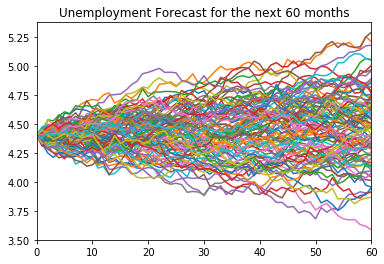

In [61]:
# Unemployment forecast

plot_title = f"Unemployment Forecast for the next {num_months} months"
simulated_unemployment.plot(legend=None, title=plot_title)

In [62]:
simulated_unemployment.iloc[1, :].head()

sim_0    4.412424
sim_1    4.410250
sim_2    4.386515
sim_3    4.418947
sim_4    4.467111
Name: 1, dtype: float64

In [63]:
# for each of the months 0 thru 60 calculate median and confidence intervals

In [64]:
# Median calculation

simulated_unemployment['median'] = simulated_unemployment.median(axis = 1)

In [65]:
# 95% Confidence Interval

simulated_unemployment['95%CI - lower'] = simulated_unemployment.quantile(.025, axis = 1)
simulated_unemployment['95%CI - upper'] = simulated_unemployment.quantile(.975, axis = 1)

In [66]:
# 90# Confidence Interval

simulated_unemployment['90%CI - lower'] = simulated_unemployment.quantile(.05, axis = 1)
simulated_unemployment['90%CI - upper'] = simulated_unemployment.quantile(.95, axis = 1)

In [67]:
simulated_unemployment['date'] = pd.date_range(start = '2020-3-1', periods = len(simulated_unemployment), freq = 'M')

In [68]:
simulated_unemployment.set_index('date')

sim_0     sim_1     sim_2     sim_3     sim_4     sim_5  \
date                                                                     
2020-03-31  4.400000  4.400000  4.400000  4.400000  4.400000  4.400000   
2020-04-30  4.412424  4.410250  4.386515  4.418947  4.467111  4.398530   
2020-05-31  4.310626  4.441175  4.411096  4.367631  4.436934  4.468830   
2020-06-30  4.322151  4.493234  4.419894  4.352823  4.470694  4.477852   
2020-07-31  4.280106  4.533749  4.356152  4.368804  4.520251  4.578034   
2020-08-31  4.258528  4.516499  4.369514  4.302075  4.494073  4.549140   
2020-09-30  4.267178  4.584372  4.361319  4.273486  4.521443  4.515216   
2020-10-31  4.273445  4.628874  4.333669  4.278803  4.483059  4.498142   
2020-11-30  4.250681  4.671772  4.357772  4.241168  4.493922  4.447486   
2020-12-31  4.308845  4.695669  4.336793  4.285579  4.488970  4.441709   
2021-01-31  4.305340  4.711520  4.384653  4.308649  4.511422  4.435208   
2021-02-28  4.310672  4.701387  4.451797  4.301656  4.534876  4.388988   
2021-03-31  4.354891  4.750629  4.468934  4.266062  4.571696  4.359564   
2021-04-30  4.365707  4.767387  4.452881  4.286712  4.525767  4.312025   
2021-05-31  4.396400  4.679971  4.471301  4.283594  4.517932  4.313951   
2021-06-30  4.467305  4.705052  4.458804  4.322412  4.478049  4.309410   
2021-07-31  4.440586  4.749744  4.535175  4.319783  4.444405  4.294457   
2021-08-31  4.470624  4.719045  4.513994  4.306954  4.367785  4.267412   
2021-09-30  4.486527  4.759017  4.589825  4.359712  4.410383  4.263783   
2021-10-31  4.509765  4.812174  4.602093  4.342930  4.392635  4.175651   
2021-11-30  4.426011  4.766613  4.588889  4.370903  4.412896  4.169681   
2021-12-31  4.392397  4.758643  4.523560  4.381877  4.371223  4.158317   
2022-01-31  4.383933  4.842356  4.529128  4.436861  4.392450  4.151377   
2022-02-28  4.385516  4.846257  4.545180  4.346032  4.413133  4.114266   
2022-03-31  4.360248  4.863259  4.565956  4.382025  4.414060  4.083981   
2022-04-30  4.325155  4.828742  4.510303  4.484210  4.393723  4.105905   
2022-05-31  4.266772  4.867183  4.481907  4.416680  4.383942  4.096281   
2022-06-30  4.275496  4.877840  4.512618  4.386369  4.330856  4.110285   
2022-07-31  4.256771  4.932447  4.445293  4.360946  4.393442  4.095050   
2022-08-31  4.347547  4.851964  4.443088  4.383295  4.337176  4.031762   
...              ...       ...       ...       ...       ...       ...   
2022-10-31  4.388497  4.902846  4.419288  4.351324  4.317711  3.968309   
2022-11-30  4.403192  4.955730  4.410835  4.299277  4.291899  3.960878   
2022-12-31  4.404915  4.997251  4.383644  4.296877  4.346702  3.945181   
2023-01-31  4.346909  4.966965  4.390256  4.379509  4.410018  3.915347   
2023-02-28  4.417943  4.975423  4.359291  4.399695  4.441788  3.892096   
2023-03-31  4.402638  4.967332  4.333362  4.431112  4.453231  3.959502   
2023-04-30  4.442866  5.014184  4.363487  4.426330  4.455794  3.962006   
2023-05-31  4.524178  5.032269  4.394532  4.408606  4.481469  3.951414   
2023-06-30  4.459769  5.012162  4.424284  4.420125  4.497306  3.899279   
2023-07-31  4.480634  4.961423  4.410858  4.428561  4.492418  3.891188   
2023-08-31  4.447005  4.971666  4.452948  4.450615  4.451624  3.927244   
2023-09-30  4.461753  4.922562  4.436762  4.389173  4.418866  3.915356   
2023-10-31  4.445922  4.952123  4.455229  4.458740  4.367418  3.883360   
2023-11-30  4.492927  4.969102  4.474302  4.487344  4.354578  3.861547   
2023-12-31  4.470480  5.057976  4.459904  4.495436  4.341659  3.942904   
2024-01-31  4.524019  5.019499  4.445637  4.427602  4.354763  3.953280   
2024-02-29  4.468871  5.041745  4.487942  4.448621  4.399260  4.015108   
2024-03-31  4.499390  5.030815  4.526850  4.440045  4.391440  4.088116   
2024-04-30  4.475953  5.020954  4.546471  4.429919  4.353261  4.055066   
2024-05-31  4.508681  5.082451  4.585766  4.418351  4.377163  4.089515   
2024-06-30  4.476921  5.103893  4.609388  4.458203  4.347347  4.136449   
2024-07-31  4.46521

In [69]:
NAME3 = simulated_unemployment.hvplot(title = "Unemployment% - Precrisis", 
                                      x = 'date', y = ['median', '95%CI - lower', '95%CI - upper'], 
                                      kind = "line", ylabel = "Unemployment Rate", ylim=(0,12))
NAME3

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [70]:
NAME1*NAME3

:Overlay
   .Curve.A_0   :Curve   [index]   (0)
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [date]   (value)

# Unemployent Rate Forecast (with crisis time data)

In [71]:
# unemployment2 has unemployment data for March/April 2020 included

unemployment2_rate = pd.DataFrame(unemployment_rate)
unemployment2_rate.index = unemployment2_rate.index.date
unemployment2_rate.tail()

0
2019-11-01  3.5
2019-12-01  3.5
2020-01-01  3.6
2020-02-01  3.5
2020-03-01  4.4

In [72]:
unemployment2_rate.append([5.0, 6.0])

0
1948-01-01  3.4
1948-02-01  3.8
1948-03-01  4.0
1948-04-01  3.9
1948-05-01  3.5
1948-06-01  3.6
1948-07-01  3.6
1948-08-01  3.9
1948-09-01  3.8
1948-10-01  3.7
1948-11-01  3.8
1948-12-01  4.0
1949-01-01  4.3
1949-02-01  4.7
1949-03-01  5.0
1949-04-01  5.3
1949-05-01  6.1
1949-06-01  6.2
1949-07-01  6.7
1949-08-01  6.8
1949-09-01  6.6
1949-10-01  7.9
1949-11-01  6.4
1949-12-01  6.6
1950-01-01  6.5
1950-02-01  6.4
1950-03-01  6.3
1950-04-01  5.8
1950-05-01  5.5
1950-06-01  5.4
...         ...
2017-12-01  4.1
2018-01-01  4.1
2018-02-01  4.1
2018-03-01  4.0
2018-04-01  4.0
2018-05-01  3.8
2018-06-01  4.0
2018-07-01  3.8
2018-08-01  3.8
2018-09-01  3.7
2018-10-01  3.8
2018-11-01  3.7
2018-12-01  3.9
2019-01-01  4.0
2019-02-01  3.8
2019-03-01  3.8
2019-04-01  3.6
2019-05-01  3.6
2019-06-01  3.7
2019-07-01  3.7
2019-08-01  3.7
2019-09-01  3.5
2019-10-01  3.6
2019-11-01  3.5
2019-12-01  3.5
2020-01-01  3.6
2020-02-01  3.5
2020-03-01  4.4
0           5.0
1           6.0

[869 rows x 1 columns]

In [73]:
# Unemployment Rate

NAME5 = unemployment2_rate.hvplot(kind = "line", ylabel = "Unemployment Rate")
NAME5

:Curve   [index]   (0)

In [74]:
# Calculate unemployment monthly change

unemployment2_monthly_chg = unemployment2_rate.pct_change()
unemployment2_monthly_chg.head()

0
1948-01-01       NaN
1948-02-01  0.117647
1948-03-01  0.052632
1948-04-01 -0.025000
1948-05-01 -0.102564

In [75]:
# Unemployment Rate change

unemployment2_monthly_chg.hvplot(kind = "line", ylabel = "Unemployment monthly change with crisis")

:Curve   [index]   (0)

In [76]:
# Average and Standard deviation for unemployment rate

unemployment2_mean = unemployment2_monthly_chg.mean()
unemployment2_std = unemployment2_monthly_chg.std()
print(unemployment2_mean, unemployment2_std)

0    0.001052
dtype: float64 0    0.039316
dtype: float64


In [77]:
# Unemployment Rate forecast with COVID-19 impact
# Unemployment Rates are monthly aggregates and published monthly

num_simulations2 = 100
num_months2 = 60

In [78]:
# Set last unemployment rate [NEED TO FIX THIS]

unemployment2_last = unemployment_rate[-1]
unemployment2_last

4.4

In [79]:
# Initialize empty dataframe
simulated_unemployment2 = pd.DataFrame()

In [80]:
simulated_unemployment2

Empty DataFrame
Columns: []
Index: []

In [81]:
# Run the simulation for the next "60" months, "100" times [NEED TO FIX THIS TOO]

for n in range(num_simulations2):
    
    # Initialize simulated unemployment with the last unemployment
    simulated_unemployment2_values = [unemployment2_last]
    
    # Simulate unemployment for 60 months
    for i in range(num_months2):
        
        # Calculate simulated unemployment using the last unemployment value within the list
        simulated_unemployment2_monthly = simulated_unemployment2_values[-1] + np.random.normal(unemployment_mean, unemployment_std)
        
        # Append to the list
        simulated_unemployment2_values.append(simulated_unemployment2_monthly)
        
    # Append from each simulation run to the dataframe
    
    simulated_unemployment2[f'sim_{n}'] = pd.Series(simulated_unemployment2_values)
    
# Print some records from the dataframe
simulated_unemployment2.head()  

sim_0     sim_1     sim_2     sim_3     sim_4     sim_5     sim_6  \
0  4.400000  4.400000  4.400000  4.400000  4.400000  4.400000  4.400000   
1  4.424307  4.430668  4.363713  4.494799  4.398409  4.365621  4.407461   
2  4.437412  4.489347  4.372568  4.495357  4.449177  4.325588  4.442966   
3  4.387227  4.453247  4.308144  4.428406  4.439080  4.336755  4.402632   
4  4.402863  4.433469  4.328599  4.460885  4.363935  4.337300  4.419866   

      sim_7     sim_8     sim_9  ...    sim_90    sim_91    sim_92    sim_93  \
0  4.400000  4.400000  4.400000  ...  4.400000  4.400000  4.400000  4.400000   
1  4.378191  4.387580  4.399389  ...  4.363344  4.432524  4.402501  4.405951   
2  4.360560  4.425674  4.434371  ...  4.386207  4.472196  4.492452  4.387778   
3  4.317179  4.364085  4.432512  ...  4.380402  4.445219  4.461005  4.424054   
4  4.298569  4.297991  4.394145  ...  4.381256  4.411808  4.443761  4.378690   

     sim_94    sim_95    sim_96    sim_97    sim_98    sim_99  
0  4.400000  4.400000  4.400000  4.400000  4.400000  4.400000  
1  4.426524  4.355232  4.358995  4.369965  4.390515  4.406303  
2  4.430225  4.414739  4.358280  4.342761  4.372919  4.409171  
3  4.470142  4.373214  4.350262  4.336266  4.324199  4.468454  
4  4.502687  4.318534  4.362171  4.350307  4.283470  4.409158  

[5 rows x 100 columns]

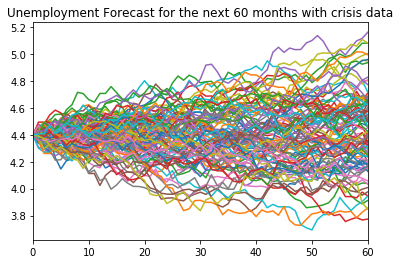

In [82]:
# Unemployment forecast with crisis

plot_title = f"Unemployment Forecast for the next {num_months2} months with crisis data"
simulated_unemployment2.plot(legend=None, title=plot_title)

In [83]:
# for each of the months 0 thru 60 calculate median and confidence intervals (Forecast with crisis data)

In [84]:
# Median calculation

simulated_unemployment2['median'] = simulated_unemployment2.median(axis = 1)

In [85]:
# 95% Confidence Interval

simulated_unemployment2['95%CI - lower'] = simulated_unemployment2.quantile(.025, axis = 1)
simulated_unemployment2['95%CI - upper'] = simulated_unemployment2.quantile(.975, axis = 1)

In [86]:
# 90# Confidence Interval

simulated_unemployment2['90%CI - lower'] = simulated_unemployment2.quantile(.05, axis = 1)
simulated_unemployment2['90%CI - upper'] = simulated_unemployment2.quantile(.95, axis = 1)

In [87]:
simulated_unemployment2['date'] = pd.date_range(start = '2020-3-1', periods = len(simulated_unemployment2), freq = 'M')

In [88]:
simulated_unemployment2.set_index('date')

sim_0     sim_1     sim_2     sim_3     sim_4     sim_5  \
date                                                                     
2020-03-31  4.400000  4.400000  4.400000  4.400000  4.400000  4.400000   
2020-04-30  4.424307  4.430668  4.363713  4.494799  4.398409  4.365621   
2020-05-31  4.437412  4.489347  4.372568  4.495357  4.449177  4.325588   
2020-06-30  4.387227  4.453247  4.308144  4.428406  4.439080  4.336755   
2020-07-31  4.402863  4.433469  4.328599  4.460885  4.363935  4.337300   
2020-08-31  4.421393  4.392398  4.392358  4.450747  4.358980  4.352812   
2020-09-30  4.459500  4.397578  4.374106  4.445869  4.321722  4.297012   
2020-10-31  4.463723  4.367619  4.449909  4.412667  4.336764  4.286398   
2020-11-30  4.461829  4.418248  4.419601  4.373661  4.306897  4.313509   
2020-12-31  4.438729  4.410527  4.393464  4.381772  4.363438  4.310867   
2021-01-31  4.475274  4.372558  4.486531  4.392279  4.391473  4.387273   
2021-02-28  4.419123  4.395959  4.545430  4.385819  4.443790  4.346295   
2021-03-31  4.418662  4.366945  4.555587  4.345516  4.462005  4.327923   
2021-04-30  4.363427  4.320080  4.634827  4.384862  4.440483  4.339730   
2021-05-31  4.323551  4.337068  4.641425  4.421087  4.421627  4.394134   
2021-06-30  4.322315  4.275370  4.665964  4.421562  4.421308  4.366307   
2021-07-31  4.340462  4.353889  4.649732  4.390197  4.389163  4.320989   
2021-08-31  4.266041  4.254578  4.650803  4.387225  4.377005  4.326647   
2021-09-30  4.316051  4.248498  4.591152  4.403805  4.353248  4.363199   
2021-10-31  4.373447  4.229019  4.568855  4.353054  4.320638  4.319000   
2021-11-30  4.453260  4.172803  4.559249  4.322499  4.336993  4.358156   
2021-12-31  4.431982  4.125132  4.514840  4.327329  4.417644  4.356043   
2022-01-31  4.454957  4.126509  4.519316  4.315325  4.431896  4.337351   
2022-02-28  4.435049  4.129957  4.572219  4.241908  4.433888  4.334683   
2022-03-31  4.423527  4.182676  4.536562  4.229149  4.448569  4.297256   
2022-04-30  4.396058  4.170466  4.525698  4.237618  4.398029  4.286108   
2022-05-31  4.437151  4.229354  4.463966  4.216042  4.428243  4.304532   
2022-06-30  4.419631  4.269050  4.514565  4.254304  4.379301  4.253484   
2022-07-31  4.461004  4.341831  4.472271  4.269278  4.340306  4.251739   
2022-08-31  4.514000  4.288335  4.479097  4.337744  4.289477  4.209017   
...              ...       ...       ...       ...       ...       ...   
2022-10-31  4.610132  4.303479  4.556216  4.370464  4.200906  4.237349   
2022-11-30  4.623762  4.263524  4.524642  4.330173  4.206138  4.208356   
2022-12-31  4.584210  4.265710  4.547084  4.364396  4.193536  4.217995   
2023-01-31  4.585182  4.290533  4.601455  4.349168  4.213556  4.138819   
2023-02-28  4.493955  4.225960  4.625742  4.356379  4.188975  4.093482   
2023-03-31  4.562402  4.268172  4.581959  4.369662  4.142683  4.148399   
2023-04-30  4.514207  4.235846  4.587647  4.360622  4.063311  4.157286   
2023-05-31  4.564231  4.293174  4.536626  4.415913  4.021337  4.163829   
2023-06-30  4.608595  4.241202  4.526788  4.385024  4.039259  4.147487   
2023-07-31  4.593732  4.233312  4.517734  4.393180  4.086766  4.136680   
2023-08-31  4.592782  4.260097  4.480395  4.405203  4.104207  4.087448   
2023-09-30  4.552956  4.280865  4.479114  4.393665  4.083024  4.168989   
2023-10-31  4.616856  4.264379  4.524783  4.402548  4.077717  4.153397   
2023-11-30  4.634834  4.286890  4.584286  4.384653  4.125263  4.151110   
2023-12-31  4.581127  4.315615  4.604568  4.370340  4.107246  4.125482   
2024-01-31  4.522983  4.339690  4.523228  4.445185  4.102807  4.138556   
2024-02-29  4.415974  4.341088  4.549002  4.504597  4.110138  4.205936   
2024-03-31  4.448454  4.326301  4.590443  4.557641  4.119698  4.242439   
2024-04-30  4.470299  4.317646  4.528003  4.493535  4.121609  4.272537   
2024-05-31  4.414719  4.303909  4.503854  4.521692  4.132939  4.261055   
2024-06-30  4.427006  4.311585  4.568088  4.572632  4.077523  4.291820   
2024-07-31  4.47124

In [89]:
NAME6 = simulated_unemployment2.hvplot(title = "Unemployment% - with crisis", 
                                      x = 'date', y = ['median', '95%CI - lower', '95%CI - upper'], 
                                      kind = "line", ylabel = "Unemployment Rate with crisis", ylim=(0,12))
NAME6

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [90]:
NAME5*NAME6

:Overlay
   .Curve.I     :Curve   [index]   (0)
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [date]   (value)